# Line Fitting 

Using least squares (minimizing the sum of squared errors) to find the best fit line for the data points given in file `xy.csv`

Formally, find parameters $a$ and $b$ that minimizes function 

\begin{align}
D &= \sum_{i=1}^n [y_i - (ax_i + b)]^2 
\end{align}

for $n$ data points $(x_1,y_1),\dots,(x_n,y_n)$

To find the minimum, we can find critical points of function D by solving for when the partial derivatives = 0: 

\begin{align}
 \frac{\partial D}{\partial a} &= \sum_{i=1}^n 2[y_i - (ax_i + b)](-x_i) = 0 \\
                               &= -\sum_{i=1}^n (y_i x_i) + \sum_{i=1}^n(ax_i^2) + \sum_{i=1}^n(bx_i) = 0 \\
                               & \to \sum_{i=1}^n(x_i^2) a + \sum_{i=1}^n(x_i)b = \sum_{i=1}^n (y_i x_i)
\end{align}


\begin{align}
 \frac{\partial D}{\partial b} &= \sum_{i=1}^n 2[y_i - (ax_i + b)](-1) = 0 \\
                               &= -\sum_{i=1}^n (y_i) + \sum_{i=1}^n(ax_i) + \sum_{i=1}^n(b) = 0 \\
                               &= -\sum_{i=1}^n (y_i) + \sum_{i=1}^n(ax_i) + nb = 0 \\
                               & \to \sum_{i=1}^n(x_i) a + nb = \sum_{i=1}^n (y_i)
\end{align}

-> results in a 2x2 linear system where you can solve for (a,b):
\begin{align}
(\sum_{i=1}^nx_i^2)a + (\sum_{i=1}^nx_i) b &= \sum_{i=1}^n (y_i x_i) \\
(\sum_{i=1}^nx_i)a + nb &= \sum_{i=1}^n (y_i)
\end{align}

In [1]:
using CSV, DataFrames
#mat = rand(10, 10)
#CSV.write("data.csv", DataFrame(mat, :auto)) # how to write any matrix into a csv file 

In [3]:
#df = CSV.read("data.csv", DataFrame)
df = CSV.read("xy.csv", DataFrame)

Row,x1,x2
,Float64,Float64
1,9.84797,-33.233
2,4.88024,-14.8645
3,6.98173,-22.3581
4,8.20767,-26.5188
5,4.82556,-14.5758
6,10.2991,-34.6486
7,0.813002,0.193896
8,7.91501,-25.9998
9,3.84465,-10.2556


In [4]:
mat = Matrix(df); # convert DataFrame into matrix

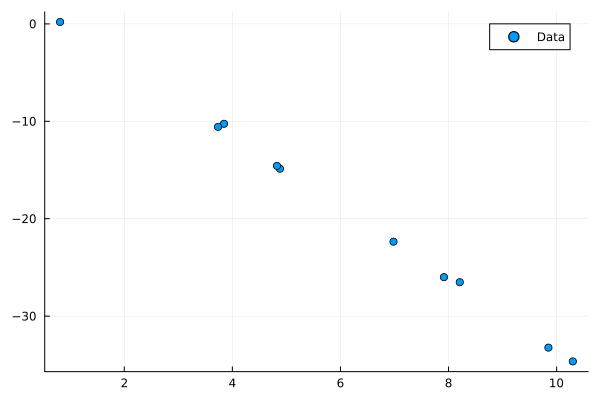

In [5]:
using Plots
scatter(mat[:, 1], mat[:, 2], label="Data")

In [11]:
# solve linear system of equations to get slope intercept 

xs = mat[:, 1]
ys = mat[:, 2]
n = length(xs)

sum_x = sum(xs)
sum_x_sq = sum(xs.^2)
sum_y = sum(ys)
sum_xy = sum(xs.*ys)

coeff = [sum_x_sq sum_x; sum_x n]  
res = [sum_xy, sum_y]

#inp = inv(coeff)*res 
inp = coeff\res 

a,b = inp

a, b

(-3.6897141397855098, 3.3531338653209204)

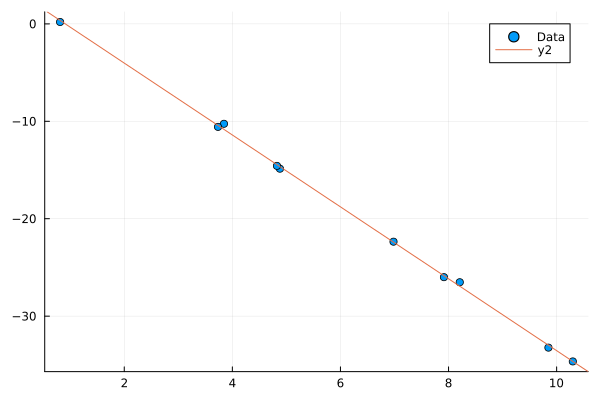

In [10]:
# plot line with points 
using Plots
scatter(mat[:, 1], mat[:, 2], label="Data")
Plots.abline!(a,b)

## Note: proving critical point is a minimum 

Note that not every critical point is a minimum. To prove that the calculated values of a and b are a (local) minimum, we use the second derivative test. 

\begin{align}
A &= \frac{\partial^2 D}{\partial a^2} \\
B &= \frac{\partial^2 D}{\partial a \partial b} = \frac{\partial^2 D}{\partial b \partial a} \\
C &= \frac{\partial^2 D}{\partial b^2} \\
\end{align}

(a,b) are a local minimum if $AC - B^2 > 0$ and $A > 0$.

\begin{align}
A &= \frac{\partial^2 D}{\partial a^2}\\
  &= \frac{\partial D}{\partial a} \frac{\partial D}{\partial a} \\
                                   &= \frac{\partial D}{\partial a}  [-\sum_{i=1}^n (y_i x_i) + \sum_{i=1}^n(ax_i^2) + \sum_{i=1}^n(bx_i)]\\
                                   &=  \sum_{i=1}^n(x_i^2) \\
\\
B &= \frac{\partial^2 D}{\partial b^2}\\
  &= \frac{\partial D}{\partial a} \frac{\partial D}{\partial b} \\
                                   &= \frac{\partial D}{\partial b}  [-\sum_{i=1}^n (y_i) + \sum_{i=1}^n(ax_i) + nb ]\\
                                   &= \sum_{i=1}^n(x_i)\\
\\
C &= \frac{\partial^2 D}{\partial b^2}\\
  &= \frac{\partial D}{\partial b} \frac{\partial D}{\partial b} \\
                                   &= \frac{\partial D}{\partial b}  [-\sum_{i=1}^n (y_i) + \sum_{i=1}^n(ax_i) + nb ]\\
                                   &=  n = 50 \\
\\
AC - B^2 &= 50(\sum_{i=1}^n(x_i^2) ) - (\sum_{i=1}^n(x_i))^2 > 0      \\
\\
A &= \sum_{i=1}^n(x_i^2) > 0
\end{align}

